In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats
%matplotlib inline

In [3]:
topics, metrics = pickle.load(open('data/run_result.pkl', 'r'))

In [4]:
topics = np.array(topics)
metrics = np.array(metrics)
print 'seed, method, topic'
print metrics.shape
print topics.shape

seed, method, topic
(4, 5, 5)
(5,)


In [5]:
labels = ['pb', 'stan', 'prism', 'tm-gibbs', 'tm-vem']

In [6]:
metrics = {labels[i]:metrics[:,i,:] for i in range(5)}

In [7]:
metrics['pb'][0].shape

(5,)

In [8]:
metrics['pb'][0]

array([ 22.96800169,  22.46275838,  22.21278127,  22.06911661,  22.15293912])

In [9]:
np.average(metrics['pb'], axis=0)

array([ 23.04422466,  22.52093453,  22.18017153,  22.12317642,  22.1536465 ])

In [10]:
#for k,v in times_metrics.iteritems():
#    print k
#    print np.average(v[0], axis=0)
#    print np.std(v[0], axis=0)
#    print np.average(v[1], axis=0)
#    print np.std(v[1], axis=0)

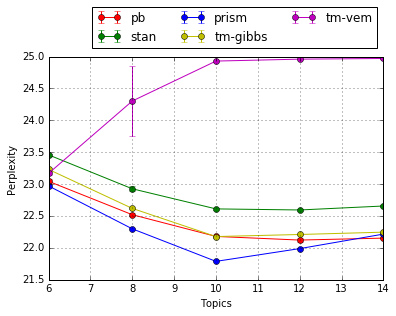

In [13]:
plt.xlabel('Topics')
plt.ylabel('Perplexity')
plt.grid()
colors = ['r', 'g', 'b', 'y', 'm']
for c, (k,v) in zip(colors, metrics.iteritems()):
    x = topics
    #print x.shape
    y = np.average(v, axis=0)
    y_err = stats.sem(v)
    #print y_err.shape
    #plt.plot(x, y, color=c, label=k, marker='o')
    #plt.fill_between(x, y-y_err, y+y_err, color=c, alpha=0.3)
    plt.errorbar(x,y, yerr = y_err, color=c, label=k, marker='o')
lgd = plt.legend(ncol=3, bbox_to_anchor=(1, 1.25))
plt.savefig('data/lls.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')